In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/sample_submission.csv")
train_VN = pd.read_csv("data/train_indexVN.csv")

In [7]:
# 전체 데이터에 대한 missing_value의 비율
4000/len(test) * 100

0.611952035199481

In [64]:
len(train), len(test)

(647054, 653646)

##### train과  test데이터의 DD, FN value 차이 제거

In [66]:
a = train["DepartmentDescription"].unique()
b = test["DepartmentDescription"].unique()
set(a) - set(b)

{'HEALTH AND BEAUTY AIDS'}

In [63]:
train[train["DepartmentDescription"] == 'HEALTH AND BEAUTY AIDS']

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
552573,36,164059,Wednesday,3.607344e+11,1,HEALTH AND BEAUTY AIDS,2250.0
612184,999,182398,Saturday,3.099723e+10,-1,HEALTH AND BEAUTY AIDS,3501.0


In [59]:
train[train["VisitNumber"] == 182398]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
612184,999,182398,Saturday,3.099723e+10,-1,HEALTH AND BEAUTY AIDS,3501.0
612185,999,182398,Saturday,7.160313e+09,-2,BEAUTY,3304.0


In [70]:
train[train["DepartmentDescription"] == 'HEALTH AND BEAUTY AIDS'] = np.nan
mytrain = train.dropna(how='all')

In [71]:
len(mytrain)

647052

In [73]:
mytrain.to_csv("data/mytrain.csv")

In [75]:
c = train["FinelineNumber"].unique()
d = test["FinelineNumber"].unique()
set(d) - set(c)

{nan,
 92.0,
 186.0,
 187.0,
 480.0,
 489.0,
 546.0,
 573.0,
 646.0,
 678.0,
 743.0,
 746.0,
 751.0,
 797.0,
 798.0,
 828.0,
 850.0,
 852.0,
 964.0,
 1024.0,
 1038.0,
 1054.0,
 1055.0,
 1068.0,
 1124.0,
 1126.0,
 1143.0,
 1263.0,
 1429.0,
 1461.0,
 1479.0,
 1492.0,
 1519.0,
 1596.0,
 1618.0,
 1713.0,
 1880.0,
 1931.0,
 2209.0,
 2213.0,
 2292.0,
 2336.0,
 2374.0,
 2480.0,
 2542.0,
 2566.0,
 2576.0,
 2578.0,
 2727.0,
 2770.0,
 2970.0,
 3048.0,
 3057.0,
 3134.0,
 3135.0,
 3136.0,
 3236.0,
 3241.0,
 3244.0,
 3278.0,
 3289.0,
 3431.0,
 3612.0,
 3653.0,
 3696.0,
 3835.0,
 3843.0,
 4044.0,
 4234.0,
 4448.0,
 4449.0,
 4527.0,
 4713.0,
 4752.0,
 5091.0,
 5306.0,
 5355.0,
 5360.0,
 5368.0,
 5369.0,
 5418.0,
 5431.0,
 5493.0,
 5546.0,
 5590.0,
 5686.0,
 5709.0,
 5902.0,
 5911.0,
 5952.0,
 6063.0,
 6096.0,
 6107.0,
 6214.0,
 6299.0,
 6314.0,
 6332.0,
 6356.0,
 6358.0,
 6385.0,
 6399.0,
 6449.0,
 6457.0,
 6473.0,
 6553.0,
 6599.0,
 6746.0,
 6781.0,
 7039.0,
 7069.0,
 7154.0,
 7214.0,
 7234.0,
 7242

In [53]:
train[train.ScanCount == -7].TripType.value_counts()

999    1
Name: TripType, dtype: int64

In [16]:
test.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,1,Friday,7.250339e+10,1,SHOES,3002.0
1,1,Friday,1.707711e+09,1,DAIRY,1526.0
2,1,Friday,8.947000e+10,1,DAIRY,1431.0
3,1,Friday,8.849121e+10,1,GROCERY DRY GOODS,3555.0
4,2,Friday,2.840015e+09,1,DSD GROCERY,4408.0


In [4]:
submission.head()

,VisitNumber,TripType_3,TripType_4,TripType_5,TripType_6,TripType_7,TripType_8,TripType_9,TripType_12,TripType_14,...,TripType_36,TripType_37,TripType_38,TripType_39,TripType_40,TripType_41,TripType_42,TripType_43,TripType_44,TripType_999
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_VN.head()

,VisitNumber,TripType,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,...,9964.0,9966.0,9967.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0
0,5,999,Friday,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,30,Friday,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,26,Friday,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,8,Friday,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,8,Friday,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
wd = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3, 
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}
train_VN["Weekday"] = train_VN["Weekday"].apply(lambda x: wd[x])

In [39]:
train_VN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94247 entries, 0 to 94246
Columns: 5266 entries, VisitNumber to 9998.0
dtypes: int64(5266)
memory usage: 3.7 GB


In [55]:
train_VN.head()

,VisitNumber,TripType,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,...,9964.0,9966.0,9967.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0
0,5,999,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,30,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,26,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,8,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,8,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
group = train.pivot_table(values='ScanCount', index=['VisitNumber'], columns=['DepartmentDescription'], aggfunc=np.sum, fill_value=0)
group.head()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x = train["TripType"]
x = x.value_counts()

Text(0.5,1,'Number of Occurences by trip type')

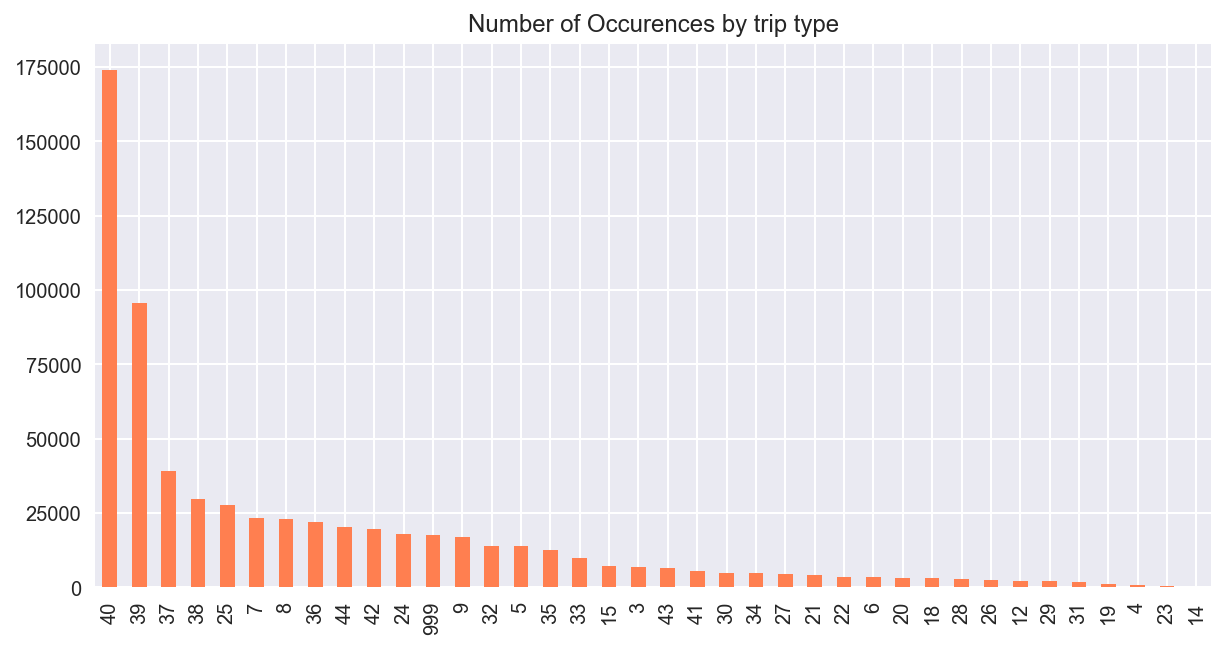

In [8]:
graph = x.plot(kind="bar", figsize=(10, 5), color="coral")
graph.set_title("Number of Occurences by trip type")

In [56]:
i = train.FinelineNumber.unique()
sort_FN = np.sort(i)
print(len(sort_FN))
sort_FN

5196


array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
             nan])

In [36]:
train.TripType.value_counts()

40     174164
39      95504
37      38954
38      29565
25      27609
7       23199
8       22844
36      21990
44      20424
42      19468
24      18015
999     17590
9       16820
32      13843
5       13836
35      12501
33       9918
15       7147
3        6827
43       6383
41       5508
30       4861
34       4751
27       4613
21       4032
22       3592
6        3405
20       3116
18       2977
28       2664
26       2507
12       2108
29       2105
31       1765
19       1188
4         901
23        325
14         35
Name: TripType, dtype: int64

In [40]:
for k in sort_VN:
    if k < 1000:
        visit = train[train.VisitNumber == k]
        visit_types = visit[["VisitNumber", "TripType"]]
        print("VisitNumber", k)
        print("TripType, counts:", visit_types.TripType.value_counts())
        print()
    else: break

VisitNumber 5
TripType, counts: 999    1
Name: TripType, dtype: int64

VisitNumber 7
TripType, counts: 30    2
Name: TripType, dtype: int64

VisitNumber 8
TripType, counts: 26    23
Name: TripType, dtype: int64

VisitNumber 9
TripType, counts: 8    3
Name: TripType, dtype: int64

VisitNumber 10
TripType, counts: 8    3
Name: TripType, dtype: int64

VisitNumber 11
TripType, counts: 35    4
Name: TripType, dtype: int64

VisitNumber 12
TripType, counts: 41    7
Name: TripType, dtype: int64

VisitNumber 15
TripType, counts: 21    8
Name: TripType, dtype: int64

VisitNumber 17
TripType, counts: 6    4
Name: TripType, dtype: int64

VisitNumber 19
TripType, counts: 42    9
Name: TripType, dtype: int64

VisitNumber 20
TripType, counts: 7    2
Name: TripType, dtype: int64

VisitNumber 23
TripType, counts: 9    2
Name: TripType, dtype: int64

VisitNumber 25
TripType, counts: 8    3
Name: TripType, dtype: int64

VisitNumber 26
TripType, counts: 39    9
Name: TripType, dtype: int64

VisitNumber 28

VisitNumber 325
TripType, counts: 9    2
Name: TripType, dtype: int64

VisitNumber 326
TripType, counts: 36    6
Name: TripType, dtype: int64

VisitNumber 328
TripType, counts: 3    2
Name: TripType, dtype: int64

VisitNumber 330
TripType, counts: 8    4
Name: TripType, dtype: int64

VisitNumber 333
TripType, counts: 999    2
Name: TripType, dtype: int64

VisitNumber 334
TripType, counts: 8    1
Name: TripType, dtype: int64

VisitNumber 335
TripType, counts: 9    1
Name: TripType, dtype: int64

VisitNumber 341
TripType, counts: 39    11
Name: TripType, dtype: int64

VisitNumber 343
TripType, counts: 8    1
Name: TripType, dtype: int64

VisitNumber 344
TripType, counts: 8    1
Name: TripType, dtype: int64

VisitNumber 346
TripType, counts: 33    7
Name: TripType, dtype: int64

VisitNumber 347
TripType, counts: 8    1
Name: TripType, dtype: int64

VisitNumber 348
TripType, counts: 3    1
Name: TripType, dtype: int64

VisitNumber 349
TripType, counts: 32    3
Name: TripType, dtype: int64


VisitNumber 567
TripType, counts: 25    8
Name: TripType, dtype: int64

VisitNumber 569
TripType, counts: 8    1
Name: TripType, dtype: int64

VisitNumber 570
TripType, counts: 33    4
Name: TripType, dtype: int64

VisitNumber 574
TripType, counts: 999    2
Name: TripType, dtype: int64

VisitNumber 576
TripType, counts: 25    2
Name: TripType, dtype: int64

VisitNumber 577
TripType, counts: 38    11
Name: TripType, dtype: int64

VisitNumber 578
TripType, counts: 3    1
Name: TripType, dtype: int64

VisitNumber 580
TripType, counts: 9    3
Name: TripType, dtype: int64

VisitNumber 581
TripType, counts: 999    4
Name: TripType, dtype: int64

VisitNumber 583
TripType, counts: 999    1
Name: TripType, dtype: int64

VisitNumber 584
TripType, counts: 39    15
Name: TripType, dtype: int64

VisitNumber 585
TripType, counts: 5    1
Name: TripType, dtype: int64

VisitNumber 589
TripType, counts: 8    4
Name: TripType, dtype: int64

VisitNumber 592
TripType, counts: 40    22
Name: TripType, dtype

TripType, counts: 8    1
Name: TripType, dtype: int64

VisitNumber 880
TripType, counts: 42    11
Name: TripType, dtype: int64

VisitNumber 881
TripType, counts: 19    1
Name: TripType, dtype: int64

VisitNumber 882
TripType, counts: 999    1
Name: TripType, dtype: int64

VisitNumber 885
TripType, counts: 7    6
Name: TripType, dtype: int64

VisitNumber 888
TripType, counts: 3    2
Name: TripType, dtype: int64

VisitNumber 890
TripType, counts: 39    7
Name: TripType, dtype: int64

VisitNumber 891
TripType, counts: 9    2
Name: TripType, dtype: int64

VisitNumber 896
TripType, counts: 6    2
Name: TripType, dtype: int64

VisitNumber 897
TripType, counts: 5    2
Name: TripType, dtype: int64

VisitNumber 898
TripType, counts: 9    3
Name: TripType, dtype: int64

VisitNumber 903
TripType, counts: 24    5
Name: TripType, dtype: int64

VisitNumber 904
TripType, counts: 999    1
Name: TripType, dtype: int64

VisitNumber 905
TripType, counts: 9    3
Name: TripType, dtype: int64

VisitNumber 9

Text(0,0.5,'ylabel')

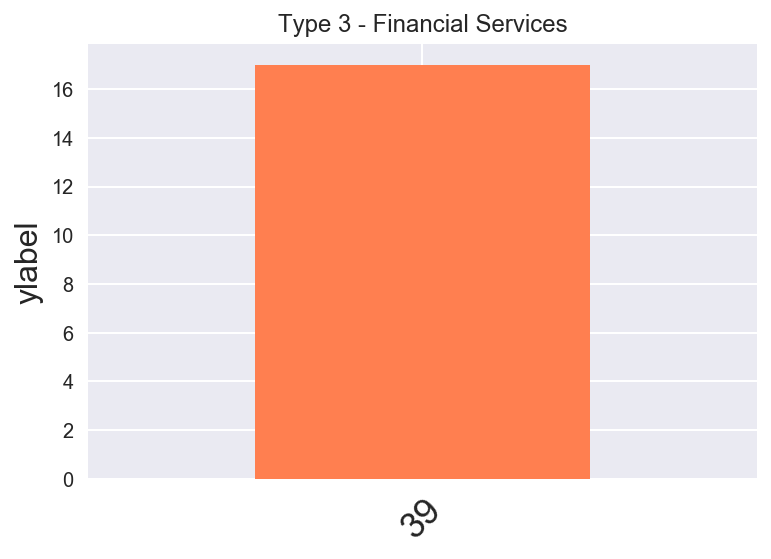

In [16]:
visit_5 = train[train.VisitNumber == 5673]
visit_5_types = visit_5[["VisitNumber", "TripType"]]
visit_5_types.TripType.value_counts().head().plot(kind="bar", rot=45, 
                                        title="Type 3 - Financial Services", color="coral")
plt.xticks(fontsize=18)
